<a href="https://colab.research.google.com/github/ashrafabuareesh/Prediction-_of-Product-Sales/blob/main/Copy_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
* Auther:Ashraf Abu Areesh



## Project Overview

### sales prediction for food items sold at various stores.
* The goal of this is to help the retailer understand the properties of products
* outlets that play crucial roles in increasing sales.

##   **Load** and **Inspect** Data

In [1]:
from google.colab import drive
drive.mount('/content/drive1')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

Mounted at /content/drive1


In [2]:
# Save the filepath and load the data as "df_predictions"
fpath= "/content/drive1/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_predictions= pd.read_csv(fpath)
df_predictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# Display the first 5 rows
df_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Display the lest 5 rows
df_predictions.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#rname columns
col_name = {"Item_Identifier":"Product ID",
            "Item_MRP":"Item_price",
            "Outlet_Identifier":"Store ID",
            "Outlet_Establishment_Year":"Store_build",
            "Outlet_Type":"Store_Type",
            "Outlet_Location_Type	":"Store_loc",
            "Outlet_Size":"Store_size"

}
df_predictions=df_predictions.rename(col_name,axis=1)
df_predictions

,Product ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_price,Store ID,Store_build,Store_size,Outlet_Location_Type,Store_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_price            8523 non-null   float64
 6   Store ID              8523 non-null   object 
 7   Store_build           8523 non-null   int64  
 8   Store_size            6113 non-null   object 
 9   Outlet_Location_Type  8523 non-null   object 
 10  Store_Type            8523 non-null   object 
 11  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Q: A1) How many rows are there?**
- Your Answer:
  - `8523`

**Q: A2) How many columns are there?**
- Your Answer:
  - `12`
  
**Q: A3)How many numeric columns?**
- Your Answer:
  - `5`

**Q: A4) How many categorical/string columns are there (dtype='object')?**
- Your Answer:
  - `7`

In [7]:
#Duplicate Rows
df_predictions.duplicated().sum()

0

In [8]:
df_predictions.nunique()
df_predictions.nunique()/len(df_predictions)*100

Product ID              18.291681
Item_Weight              4.869178
Item_Fat_Content         0.058665
Item_Visibility         92.455708
Item_Type                0.187727
Item_price              69.670304
Store ID                 0.117330
Store_build              0.105597
Store_size               0.035199
Outlet_Location_Type     0.035199
Store_Type               0.046932
Item_Outlet_Sales       40.983222
dtype: float64

<Axes: >

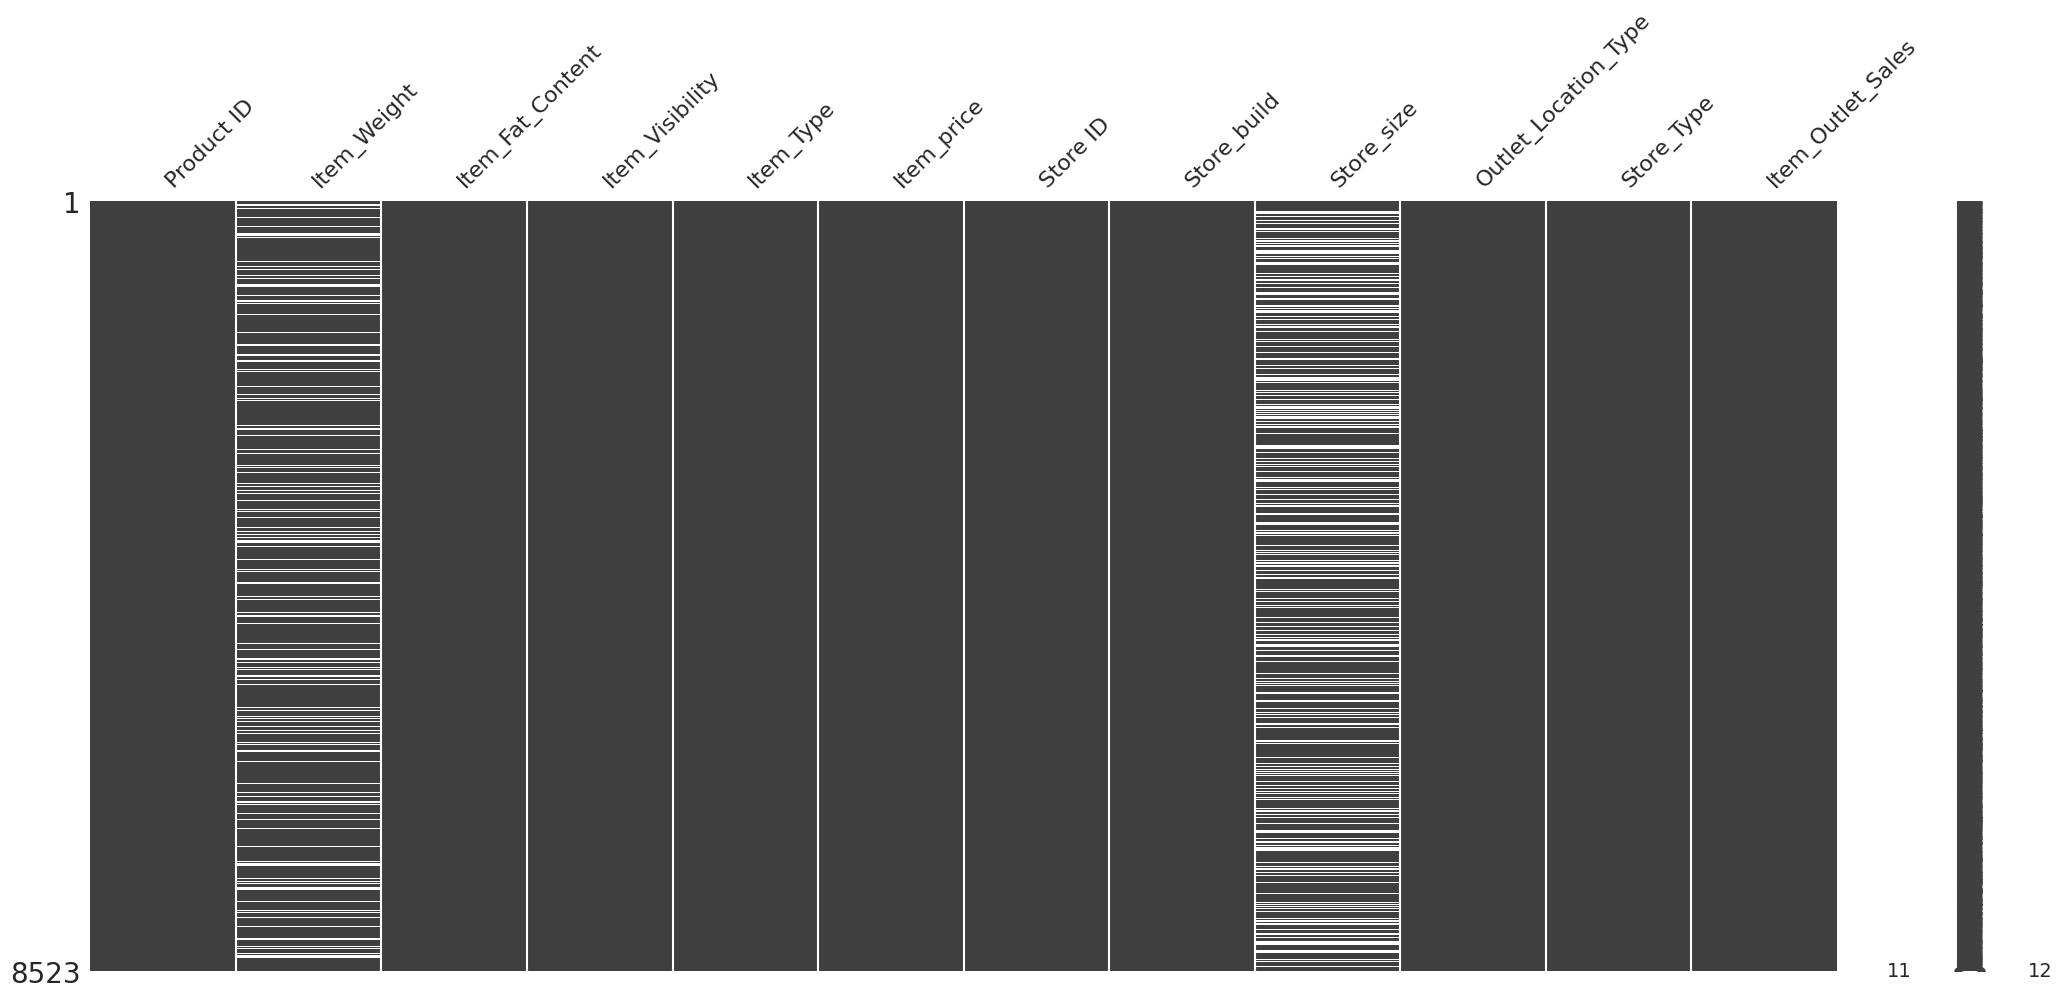

In [9]:
#  nulls using using missingno
import  missingno as msno
msno.matrix(df_predictions)

In [10]:
## Use .select_dtypes to view only object columns

col_object=df_predictions.select_dtypes("object").columns
col_object

Index(['Product ID', 'Item_Fat_Content', 'Item_Type', 'Store ID', 'Store_size',
       'Outlet_Location_Type', 'Store_Type'],
      dtype='object')

In [11]:
df_predictions[col_object].isna().sum()    #Store_size  >>2410 value null

Product ID                 0
Item_Fat_Content           0
Item_Type                  0
Store ID                   0
Store_size              2410
Outlet_Location_Type       0
Store_Type                 0
dtype: int64

In [12]:
df_predictions['Store_size'].value_counts()
df_predictions['Store_size']=df_predictions['Store_size'].fillna(np.nan)
df_predictions['Store_size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Store_size, dtype: int64

In [13]:
df_predictions[col_object].isna().sum()

Product ID                 0
Item_Fat_Content           0
Item_Type                  0
Store ID                   0
Store_size              2410
Outlet_Location_Type       0
Store_Type                 0
dtype: int64

In [14]:
#Checking & Fixing Consistency
for col in col_object:
  print(f"name of columns {col}")
  print(f'value count {df_predictions[col].value_counts()}')
  print('\n')

name of columns Product ID
value count FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Product ID, Length: 1559, dtype: int64


name of columns Item_Fat_Content
value count Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


name of columns Item_Type
value count Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


name of columns Store ID
value count OUT027    935
OUT013    932
OUT

In [15]:
df_predictions['Item_Fat_Content']=df_predictions['Item_Fat_Content'].replace({'reg':"Regular" , "LF":"Low Fat","low fat":"Low Fat"})
df_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
#numeric columns
col_num= df_predictions.select_dtypes("number").columns
col_num

Index(['Item_Weight', 'Item_Visibility', 'Item_price', 'Store_build',
       'Item_Outlet_Sales'],
      dtype='object')

In [17]:

df_predictions[col_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        7060 non-null   float64
 1   Item_Visibility    8523 non-null   float64
 2   Item_price         8523 non-null   float64
 3   Store_build        8523 non-null   int64  
 4   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [18]:
## Convert the  Store_build  column to float dtype
df_predictions['Store_build']=df_predictions['Store_build'].astype(float)
df_predictions[col_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        7060 non-null   float64
 1   Item_Visibility    8523 non-null   float64
 2   Item_price         8523 non-null   float64
 3   Store_build        8523 non-null   float64
 4   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(5)
memory usage: 333.1 KB


In [19]:
df_predictions[col_num].isna().sum()   #Item_Weight>>1463

Item_Weight          1463
Item_Visibility         0
Item_price              0
Store_build             0
Item_Outlet_Sales       0
dtype: int64

In [20]:
df_predictions['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [21]:
#df_predictions['Item_Weight'].mean()
#df_predictions['Item_Weight']=df_predictions['Item_Weight'].fillna(1)
df_predictions['Item_Weight'].describe()
df_predictions['Item_Weight']=df_predictions['Item_Weight'].fillna(np.nan)
df_predictions[col_num].isna().sum()


Item_Weight          1463
Item_Visibility         0
Item_price              0
Store_build             0
Item_Outlet_Sales       0
dtype: int64

In [22]:
df_predictions.isna().sum()

Product ID                 0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_price                 0
Store ID                   0
Store_build                0
Store_size              2410
Outlet_Location_Type       0
Store_Type                 0
Item_Outlet_Sales          0
dtype: int64

<Axes: >

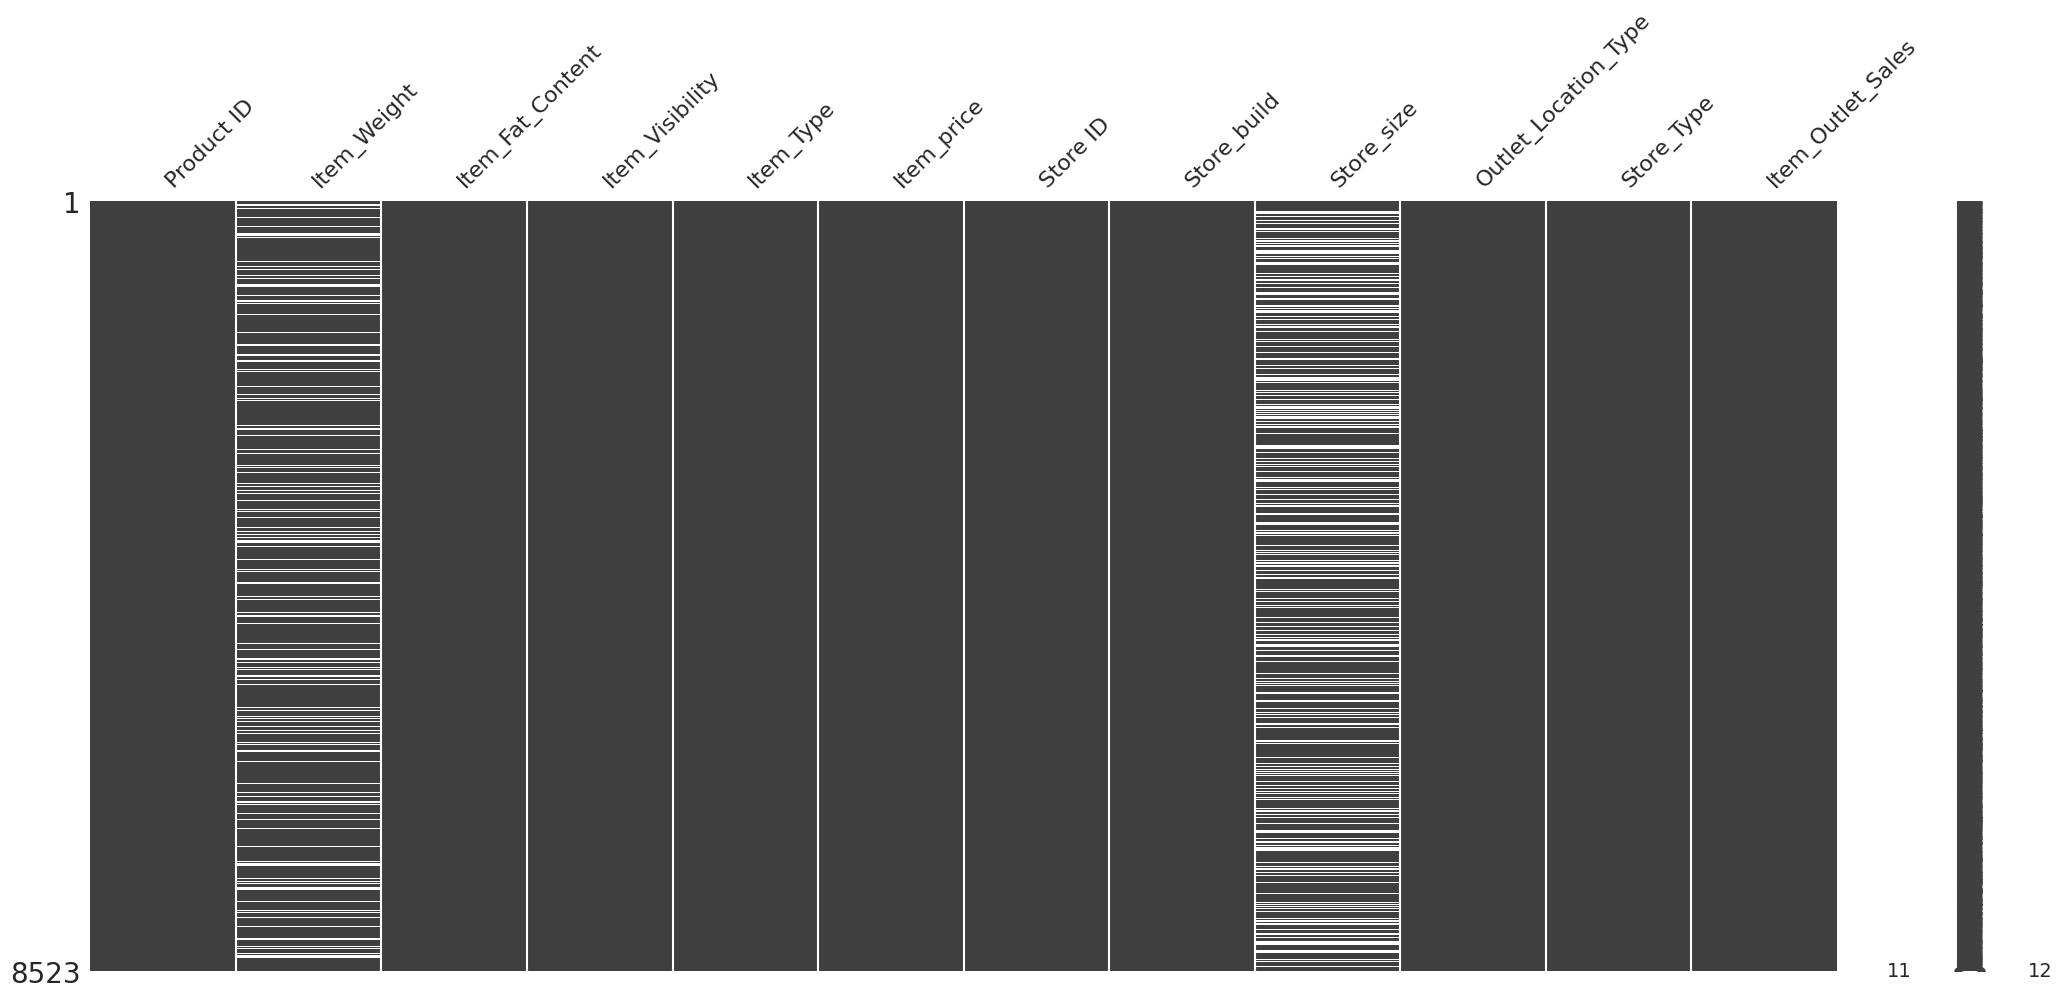

In [23]:
# Confirm no more nulls using using missingno
import  missingno as msno
msno.matrix(df_predictions)

In [24]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
for col in col_num:
  print(f'the mean value {df_predictions[col].mean() }')
  print(f'the maximum value {df_predictions[col].max() }')
  print(f'the minimum value {df_predictions[col] .min()}')
  print('\n')


the mean value 12.857645184135976
the maximum value 21.35
the minimum value 4.555


the mean value 0.06613202877895108
the maximum value 0.328390948
the minimum value 0.0


the mean value 140.9927819781767
the maximum value 266.8884
the minimum value 31.29


the mean value 1997.8318667135984
the maximum value 2009.0
the minimum value 1985.0


the mean value 2181.288913575032
the maximum value 13086.9648
the minimum value 33.29




In [25]:
#Description of columns
for col in col_num:
  print(f'Description of column {col}')
  print(f'{df_predictions[col].describe()}')
  print('\n')

Description of column Item_Weight
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Description of column Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Description of column Item_price
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_price, dtype: float64


Description of column Store_build
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Store_build, dtype: float64


Description of column Item_Outlet_Sales
co

In [26]:
fpath_out="/content/drive1/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023_clean2.csv"
df_predictions.to_csv(fpath_out,index=True)

## **Exploratory** Data Analysis

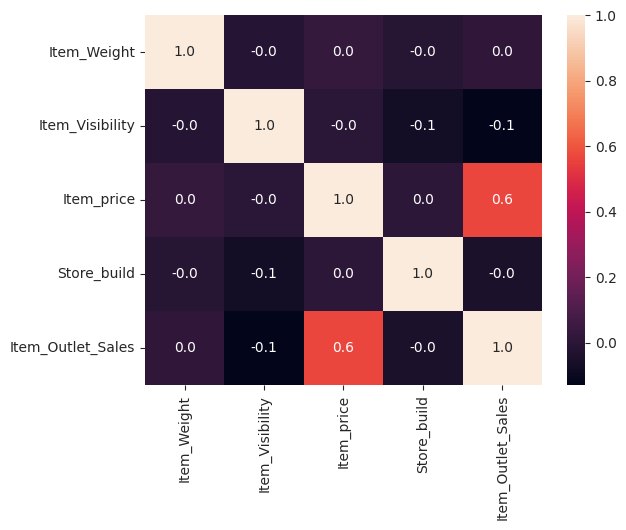

In [27]:
#heatmap
fig,ax=plt.subplots()
corr=df_predictions.corr(numeric_only=True)
ax=sns.heatmap(corr,annot=True,fmt='.1f')


* We notice a relationship between sales and the price of products in stores


Text(0.5, 1.0, 'Histograms Item Outlet Sales')

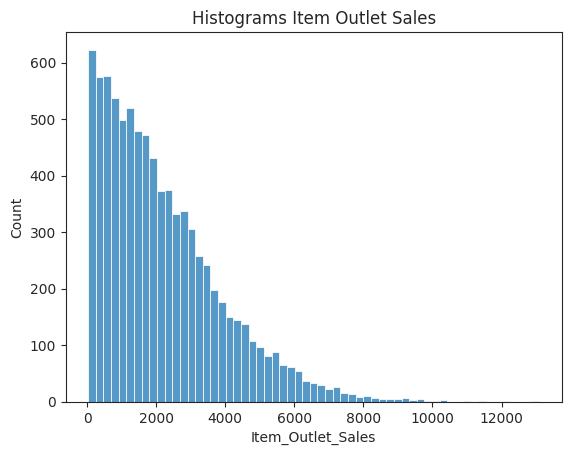

In [28]:
ax=sns.histplot(data=df_predictions,x="Item_Outlet_Sales")
ax.set_title("Histograms Item Outlet Sales")


Text(0.5, 1.0, 'Products prices')

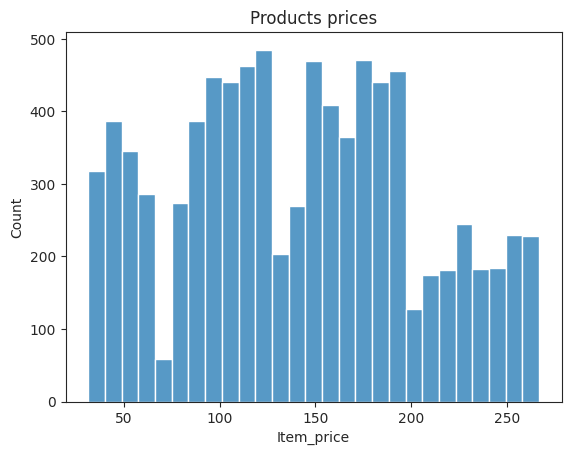

In [29]:
ax=sns.histplot(data=df_predictions,x="Item_price")
ax.set_title("Products prices")

* Product prices range from 0-250$

Text(0.5, 1.0, 'boxplot Item Outlet Sales')

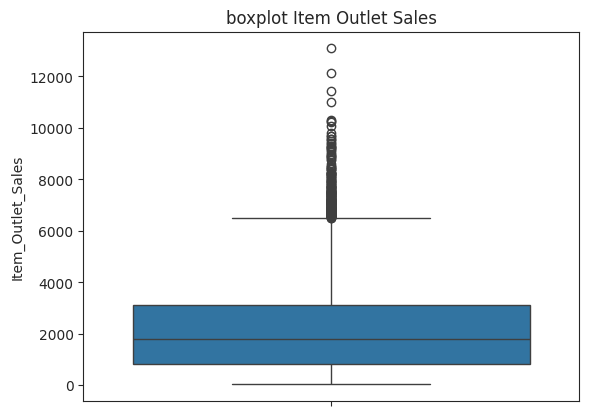

In [30]:
ax= sns.boxplot(data=df_predictions,y="Item_Outlet_Sales")
ax.set_title("boxplot Item Outlet Sales")

Text(0.5, 1.0, 'boxplot Products prices')

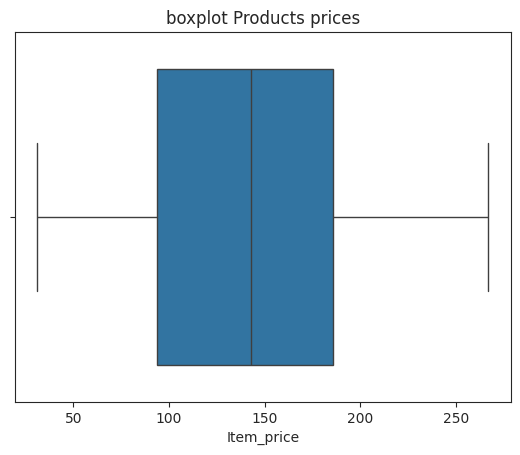

In [31]:

ax=sns.boxplot(data=df_predictions,x="Item_price")
ax.set_title("boxplot Products prices" )

Text(0.5, 1.0, 'Number of stores VS. year of construction')

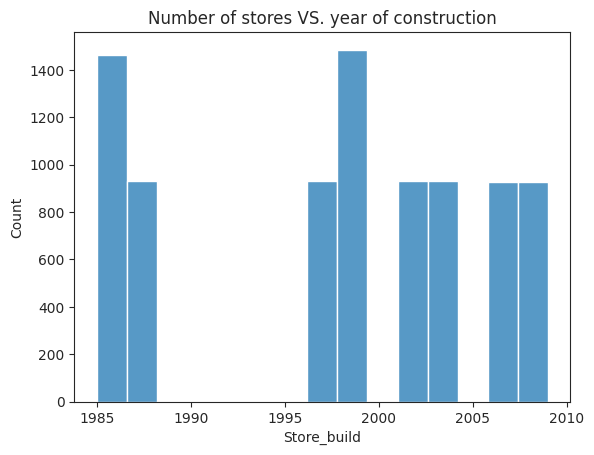

In [32]:
ax=sns.histplot(data=df_predictions,x="Store_build")
ax.set_title("Number of stores VS. year of construction")

Text(0.5, 1.0, 'Fat content vs. Item sales ')

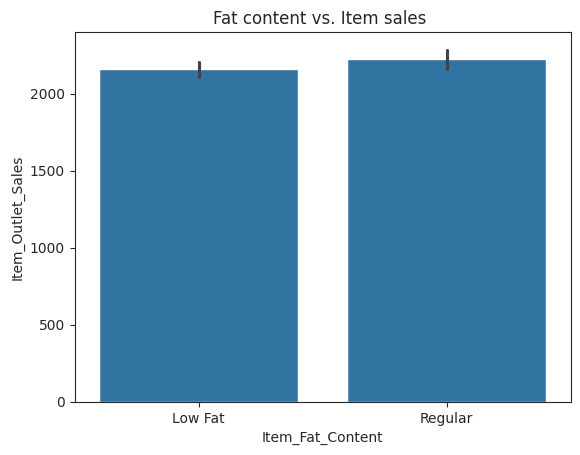

In [33]:
ax= sns.barplot(data=df_predictions,x="Item_Fat_Content",y="Item_Outlet_Sales"  )
ax.set_title("Fat content vs. Item sales ")

* By comparing the heights of the bars corresponding to each fat content category, we can see that the average sales of products with normal fat content are higher than the average sales of products with low fat content.

<ipython-input-34-4949fffa4eab>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.0, 'Item Type Vs. Sales of the product in the particular store')

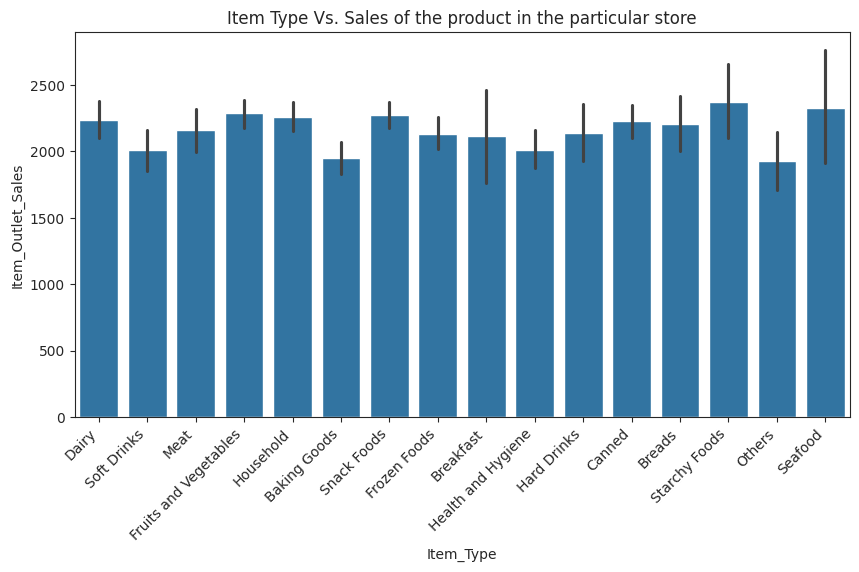

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(data=df_predictions,x="Item_Type",y="Item_Outlet_Sales"  )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Item Type Vs. Sales of the product in the particular store")


<ipython-input-35-db81fe87c287>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.0, 'story type Vs.Item outlet sales')

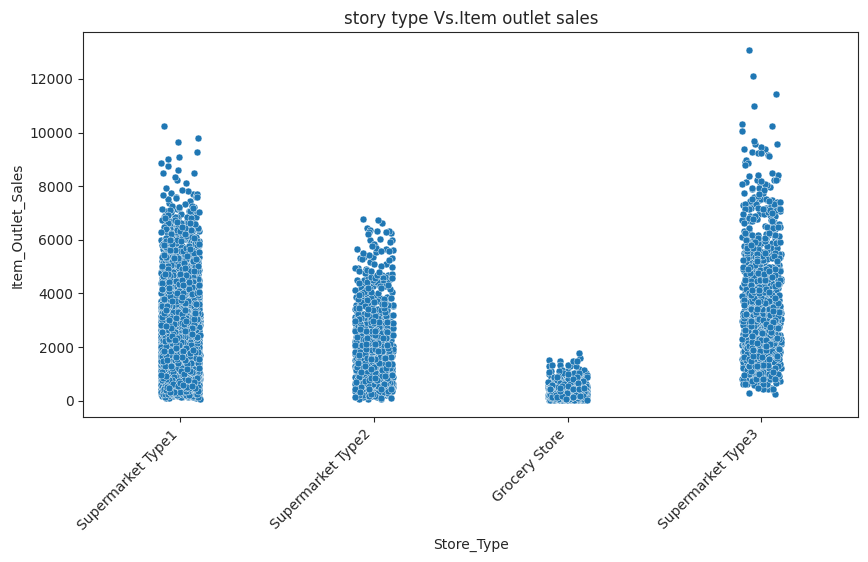

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.stripplot(data=df_predictions,x="Store_Type",y="Item_Outlet_Sales" , edgecolor="white" ,linewidth=0.3 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("story type Vs.Item outlet sales")


*  You can identify stores with higher average sales compared to others, indicating stronger performance.

<ipython-input-36-96579b36e62a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


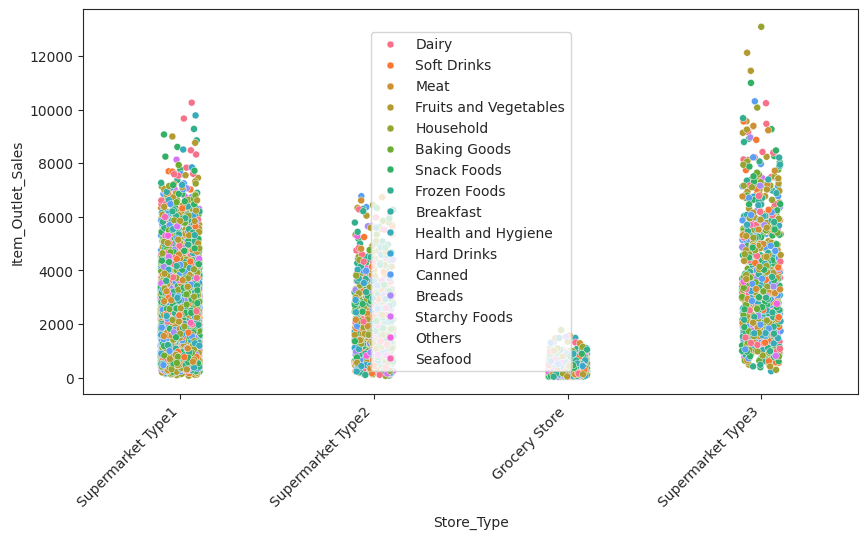

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.stripplot(data=df_predictions,x="Store_Type",y="Item_Outlet_Sales" ,hue= "Item_Type" , linewidth=0.3 , edgecolor="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc=10);


<ipython-input-37-60f774bcd7a3>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0.5, 1.0, 'Item typy vs. Item outlet sales ,color (story type)')]

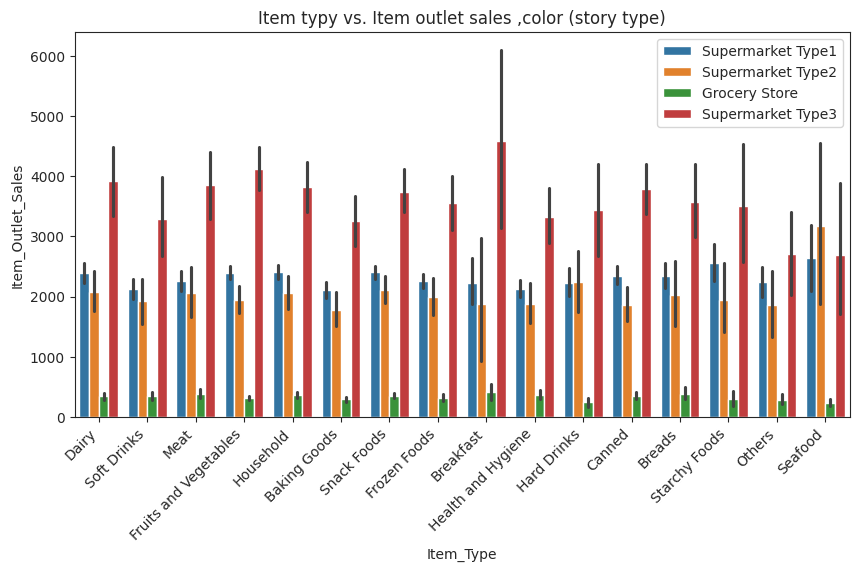

In [37]:

fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(data=df_predictions,x="Item_Type",y="Item_Outlet_Sales" ,hue= "Store_Type" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc=1);
ax.set(title="Item typy vs. Item outlet sales ,color (story type)")


* You might notice that certain stores sell more items than others, indicating differences in popularity, location, or marketing effectiveness.
* By carefully examining the graph showing items sold in each store, you can gain valuable insights into store performance, customer preferences, and potential areas for optimization or intervention.
* the highest average seles of all items in a supermarket type3

* the lowest average seles of all items in a grocery store


<ipython-input-38-c79b52439a8f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0.5, 1.0, 'Story Type  vs. Item outlet sales ,color (location)')]

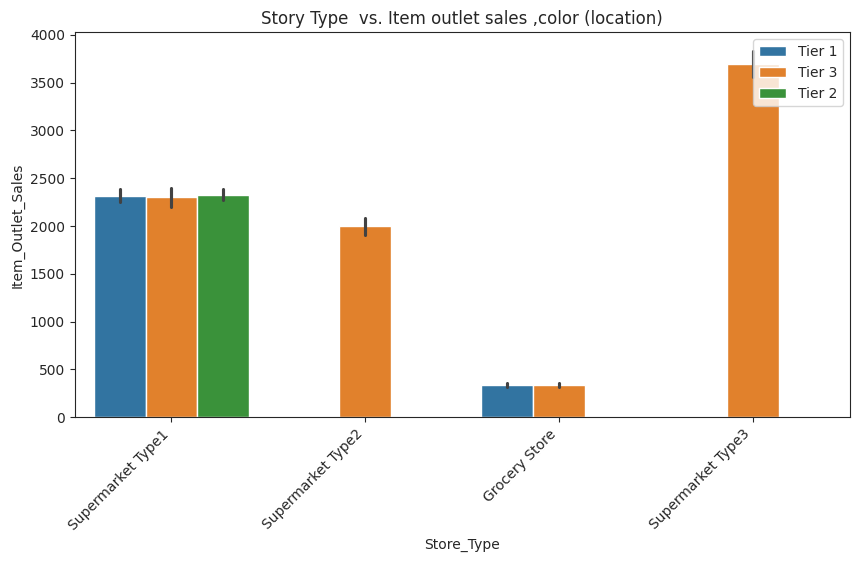

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(data=df_predictions,x="Store_Type",y="Item_Outlet_Sales" ,hue= "Outlet_Location_Type" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc=1);
ax.set(title="Story Type  vs. Item outlet sales ,color (location)")

* You might notice differences in average sales between stores located in different regions or areas, which could be influenced by factors such as population density, income levels, or competition.

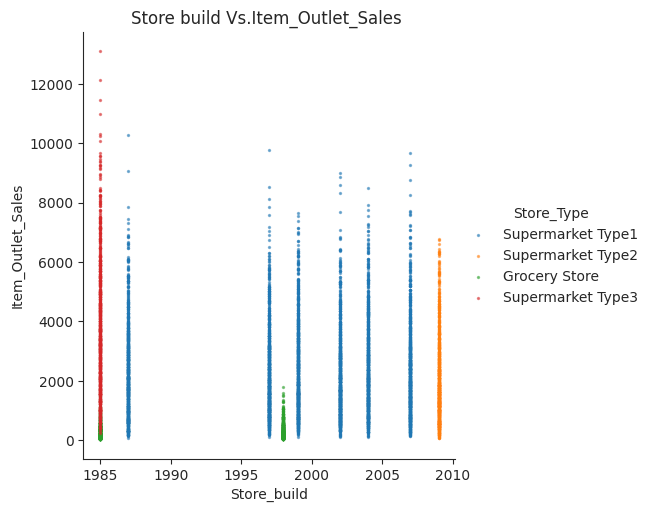

In [39]:
ax = sns.lmplot(data=df_predictions , x= "Store_build" , y = "Item_Outlet_Sales" , hue="Store_Type" , fit_reg=False ,scatter_kws={'s': 2, 'alpha': 0.5})
ax.set(title="Store build Vs.Item_Outlet_Sales ")

* Older stores might have had more time to establish their brand and reputation within the community, leading to higher sales due to customer loyalty and trust.
* Older stores might be located in more favorable or established areas with higher foot traffic ,leading to higher sales.


#Feature **Inspection**

##    _ EDA Functions - Univariate

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes
  """MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax


In [41]:
df_predictions

,Product ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_price,Store ID,Store_build,Store_size,Outlet_Location_Type,Store_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976


## Item_Weight

In [42]:
feature='Item_Weight'
df_predictions[feature].dtype

dtype('float64')

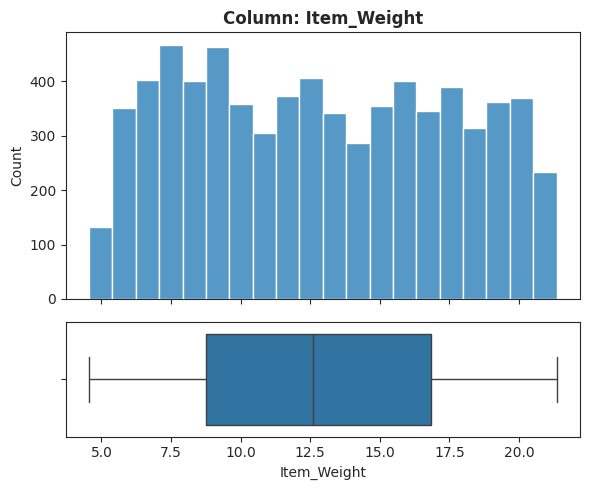

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [43]:
explore_numeric(df_predictions,x=feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


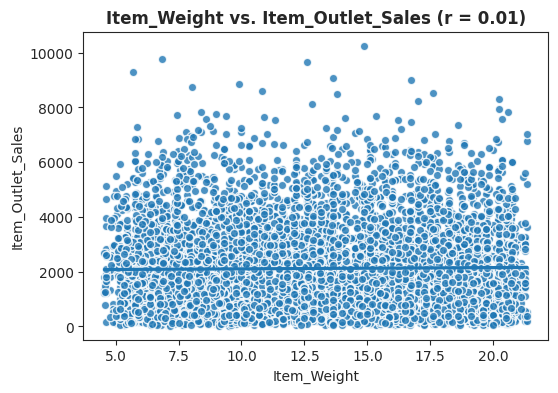

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [44]:
plot_numeric_vs_target(df_predictions,x='Item_Weight')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - NO
  - Does this feature appear to be a predictor of the target?
    - NO!


## Item_Fat_Conten
    

*   - Low Fat    
    -  Regular

In [45]:
df_predictions['Item_Fat_Content'] .dtype

dtype('O')

<ipython-input-40-b7a20a5196f3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


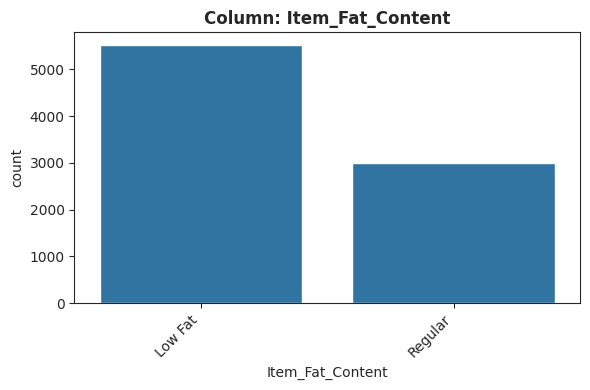

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [46]:
explore_categorical(df_predictions , x='Item_Fat_Content')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - low cardinality (2)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


<ipython-input-40-b7a20a5196f3>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

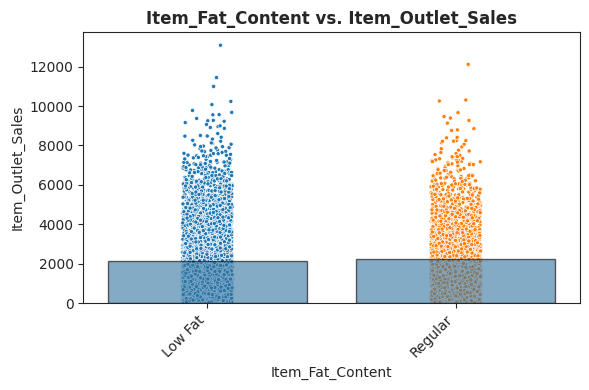

In [47]:
plot_categorical_vs_target(df_predictions ,x='Item_Fat_Content')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - maybe .
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the groups , Variation between data is small


## Item_Visibility

In [49]:
df_predictions['Item_Visibility'].dtype

dtype('float64')

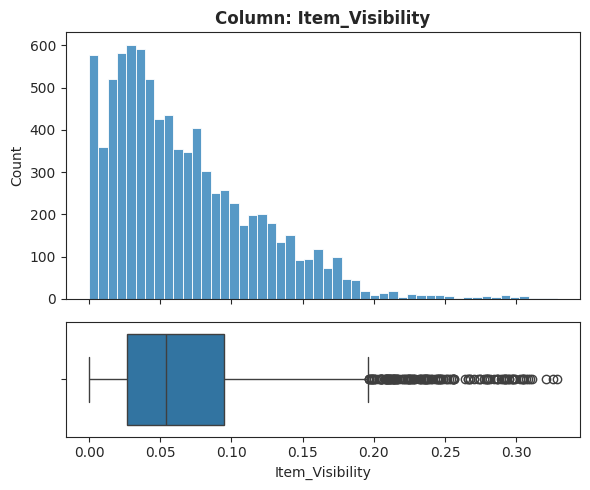

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [50]:
explore_numeric(df_predictions,x='Item_Visibility')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null value

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

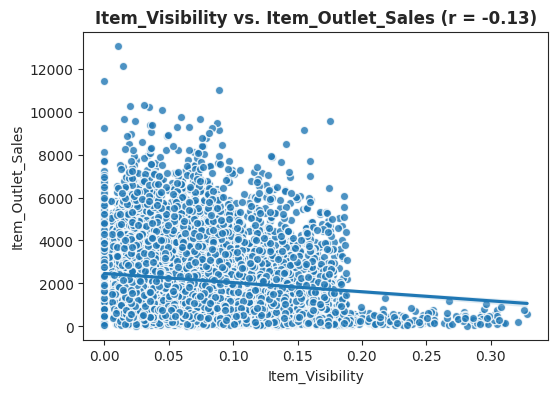

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [52]:
plot_numeric_vs_target(df_predictions , x = 'Item_Visibility')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - A correlation coefficient of -0.13 indicates a weak negative correlation between the two variables,The opposite of what was expected  



## Item_Type

In [58]:
df_predictions['Item_Type'] .dtype

dtype('O')

<ipython-input-40-b7a20a5196f3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


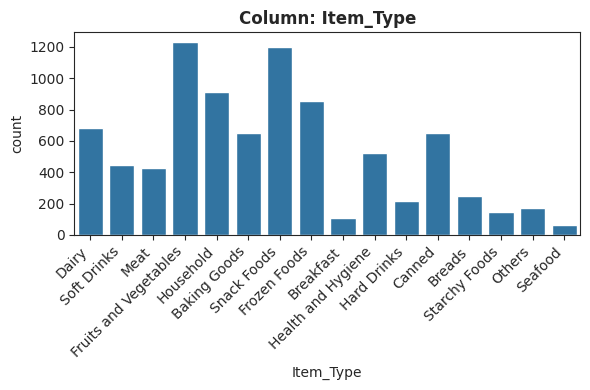

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [59]:
explore_categorical(df_predictions,x= 'Item_Type')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - high cardinality (16>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


<ipython-input-40-b7a20a5196f3>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

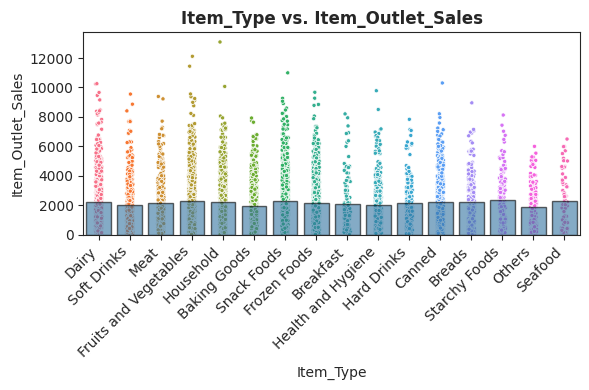

In [60]:
plot_categorical_vs_target(df_predictions , x = 'Item_Type')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes


## Item_price

In [63]:
df_predictions['Item_price'].dtype

dtype('float64')

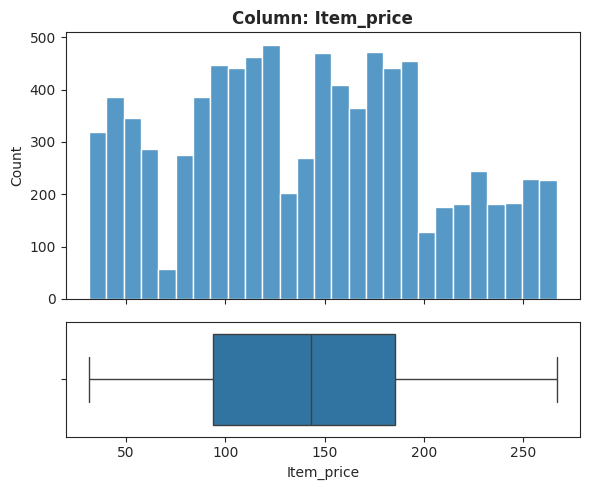

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_price'}, xlabel='Item_price', ylabel='Count'>,
        <Axes: xlabel='Item_price'>], dtype=object))

In [65]:
explore_numeric(df_predictions,x= 'Item_price')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null value

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

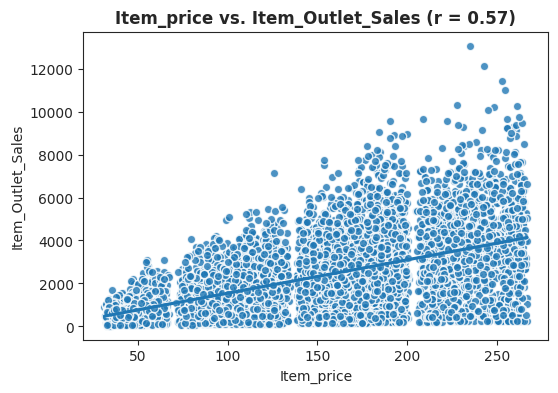

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_price vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_price', ylabel='Item_Outlet_Sales'>)

In [66]:
plot_numeric_vs_target(df_predictions , x= 'Item_price')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes ,  


## Store_build

In [69]:
df_predictions['Store_build'].dtype

dtype('float64')

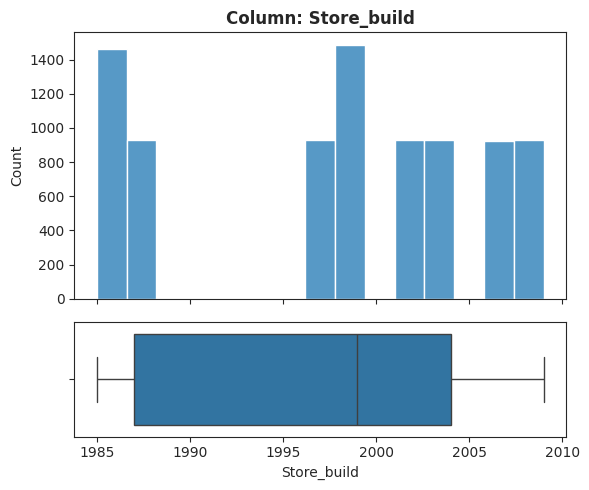

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985.0' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Store_build'}, xlabel='Store_build', ylabel='Count'>,
        <Axes: xlabel='Store_build'>], dtype=object))

In [70]:
explore_numeric(df_predictions, x= 'Store_build')


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null value

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

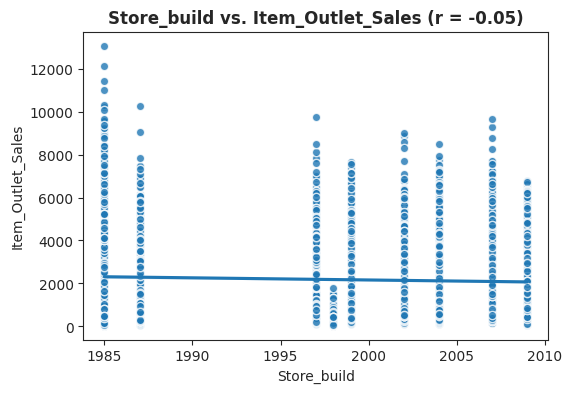

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store_build vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Store_build', ylabel='Item_Outlet_Sales'>)

In [71]:
plot_numeric_vs_target(df_predictions ,x ="Store_build")


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes ,Sales in old buildings are high , The opposite of what was expected


## Store_size

In [73]:
df_predictions['Store_size'].dtype

dtype('O')

<ipython-input-40-b7a20a5196f3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


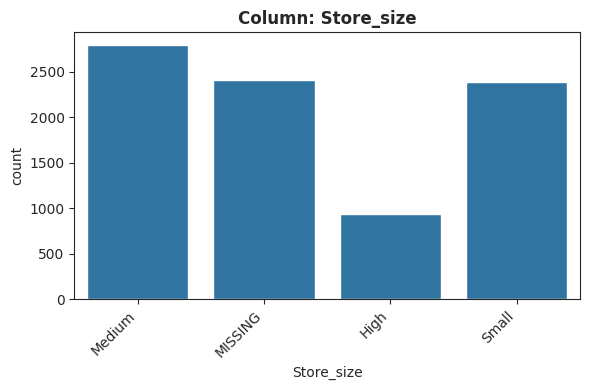

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Store_size'}, xlabel='Store_size', ylabel='count'>)

In [74]:
explore_categorical(df_predictions,x= 'Store_size')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values ( 28.28)
  - impute placeholder (Missing)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - low cardinality  

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


<ipython-input-40-b7a20a5196f3>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store_size vs. Item_Outlet_Sales'}, xlabel='Store_size', ylabel='Item_Outlet_Sales'>)

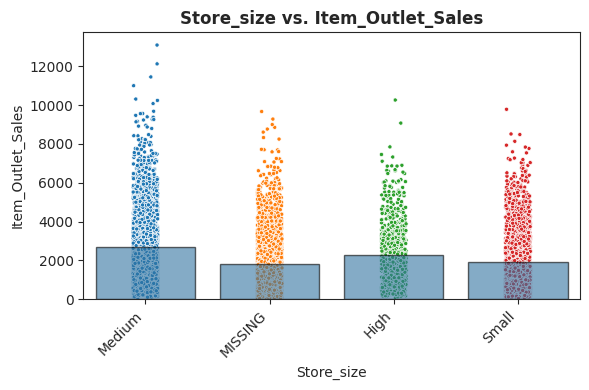

In [75]:
plot_categorical_vs_target(df_predictions , x= 'Store_size')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes ,


# Outlet_Location_Type

In [78]:
df_predictions['Outlet_Location_Type'] .dtype

dtype('O')

<ipython-input-40-b7a20a5196f3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


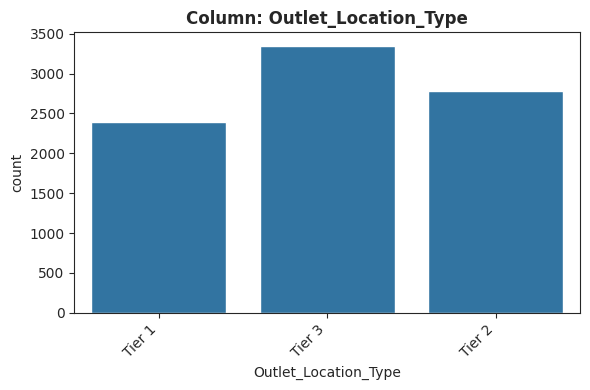

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [79]:
explore_categorical(df_predictions, x= 'Outlet_Location_Type')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -0 null values
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - low cardinality  

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


<ipython-input-40-b7a20a5196f3>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

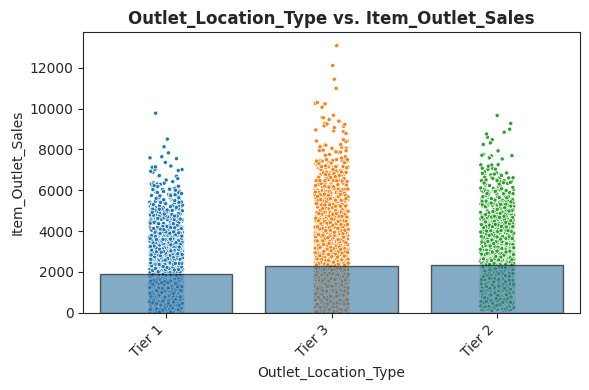

In [80]:
plot_categorical_vs_target(df_predictions ,x ='Outlet_Location_Type')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes , As expected


# Store_Type

In [83]:
df_predictions['Store_Type'].dtype

dtype('O')

<ipython-input-40-b7a20a5196f3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


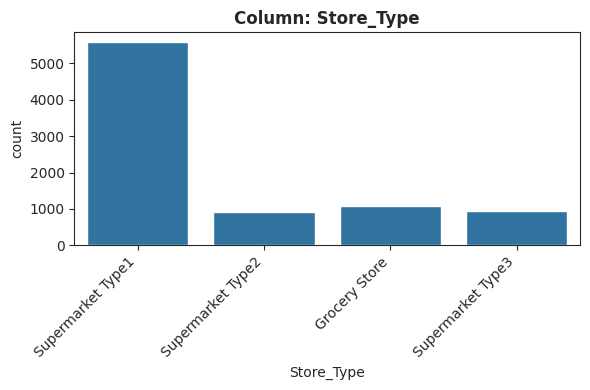

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Store_Type'}, xlabel='Store_Type', ylabel='count'>)

In [84]:
explore_categorical(df_predictions , x= 'Store_Type')


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -0 null values
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - low cardinality  

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

<ipython-input-40-b7a20a5196f3>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store_Type vs. Item_Outlet_Sales'}, xlabel='Store_Type', ylabel='Item_Outlet_Sales'>)

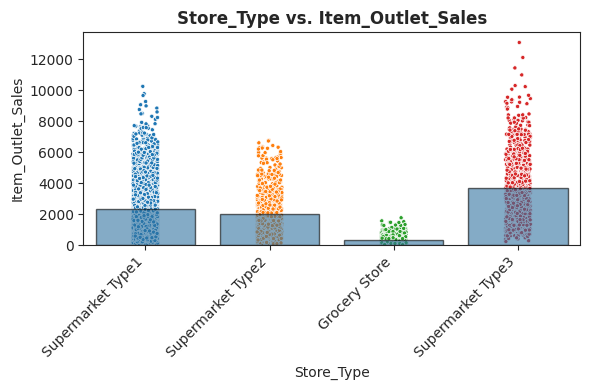

In [85]:
plot_categorical_vs_target(df_predictions,x= 'Store_Type')


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes



